In [1]:
import rc
import rcsignal
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os
from datetime import timedelta, datetime

In [2]:
parameters = rc.get_parameters()
parameters

{'output_folder': '/home/dolf/tmp',
 'rc_base_folder': '/home/dolf/rc2017',
 'source_fps': '25',
 'source_h': '1080',
 'source_w': '1920'}

In [3]:
talk_info = rc.load_talk_info('howe_force')
talk_info

{'cam_input_folder': 'conference_hall/20170713/oggend/video',
 'name': 'howe_force',
 'original_audio_file': 'conference_hall/20170713/oggend/conference_20170713_oggend_klank_1.wav',
 'start_time_ms': '713000',
 'start_video': '19',
 'stop_time_ms': '795000',
 'stop_video': '21'}

In [4]:
# camera_wav_filename = rc.extract_camera_audio(talk_info['name'])
camera_wav_filename = os.path.join(parameters['output_folder'], '{}_camera.wav'.format(talk_info['name']))
print(camera_wav_filename)

/home/dolf/tmp/howe_force_camera.wav


In [10]:
# Camera follows large audio file by approximately 1h22m47s for howe_force (4967 seconds)
t_corr, corr = rcsignal.correlate_audio_files(
    talk_info['original_audio_file'],
    camera_wav_filename,
    window_duration=.05
)

delay = t_corr[np.argmax(corr)]

/home/dolf/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


<IPython.core.display.Javascript object>


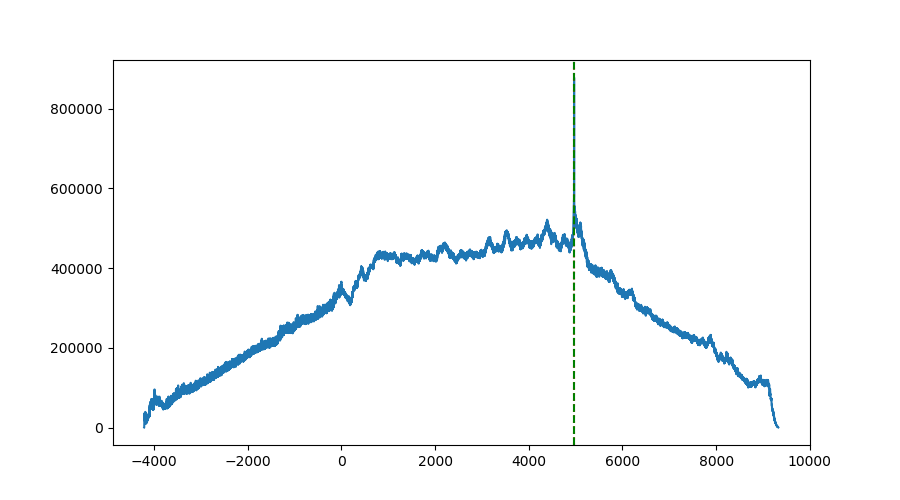

4967.45


In [11]:
%matplotlib notebook
fig = plt.figure(figsize=(9, 5))
ax = plt.gca()

ax.plot(t_corr, corr)
ax.axvline(4967, c='r', linestyle=':')
ax.axvline(delay, c='g', linestyle='--')

plt.show()

print(delay)

In [17]:
subprocess.check_call([
    'ffmpeg',
    # global options:
    '-y',  # overwrite
    # input stream 0
    '-i', talk_info['original_audio_file'],
    # output options:
    '-ss', str(delay),
    '-t', str(rc.media_length(camera_wav_filename) / 1000.),
    '-acodec', 'copy',
    os.path.join(parameters['output_folder'], '{}_mics_audio.wav'.format(talk_info['name']))
])

0